In [58]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import os
import pandas as pd

In [59]:
geom_file = "/Users/afox/Jedi/Jedi_experiments/input/wrf_hydro_nwm_files/geometry_cfs_long_range_ens.nc"

inc_file = "/Users/afox/Jedi/Jedi_experiments/output/letkf/conus_swe/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z.PT0S"

In [60]:
field_name = "SNEQV" #"SNOWH"

In [61]:
 # Get field units from the file
#units = ncfile.variables[field_name].units
units = "mm"

In [62]:
#model_layer = None

In [63]:
# Open the file
print('\nOpening ', geom_file, 'for reading')
ncfile = netCDF4.Dataset(geom_file, mode='r')


Opening  /Users/afox/Jedi/Jedi_experiments/input/wrf_hydro_nwm_files/geometry_cfs_long_range_ens.nc for reading


In [64]:
# Get metadata from the file
npx = ncfile.dimensions["west_east"].size
npy = ncfile.dimensions["south_north"].size
npz = 1

In [65]:
lons = ncfile.variables["XLONG"][:]
lats = ncfile.variables["XLAT"][:]

In [66]:
# Print field dimensions
print(" Grid dimensions", npx, 'x', npy, 'x', npz)

 Grid dimensions 4608 x 3840 x 1


In [67]:
# Zero out array to fill with field
hgt = np.zeros((npy, npx))

In [68]:
hgt[:,:] = ncfile.variables["HGT"][:,:]

In [69]:
cmax = np.max(hgt)
cmin = np.min(hgt)
cmap_h = 'gray'

levels_h = np.linspace(cmin,cmax,50)

In [70]:
# Open the background file
print('\nOpening ', inc_file, 'for reading')
ncfile = netCDF4.Dataset(inc_file, mode='r')


Opening  /Users/afox/Jedi/Jedi_experiments/output/letkf/conus_swe/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z.PT0S for reading


In [71]:
# Zero out array to fill with field
inc = np.zeros((npy, npx))

In [72]:
# Message and read the field at provided layer
print(" Reading field ", field_name)
inc[:,:] = ncfile.variables[field_name][:,:]

title = "Contour of "+field_name+" ("+units+")"
outfile = os.path.splitext(inc_file)[0]+"_"+field_name+".png"


 Reading field  SNEQV


In [73]:
increment = inc

In [74]:
# Check if field has positve and negative values
# ----------------------------------------------
if np.min(increment) < 0:
      cmax = np.max(np.abs(increment))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(increment)
      cmin = np.min(increment)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,50)


In [75]:
lats = np.squeeze(lats)
lons = np.squeeze(lons)

 Saving figure as hgt.png 



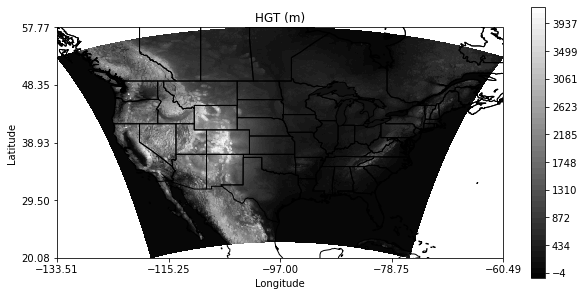

In [76]:
# Create two dimensional contour plot of HGT

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, hgt,
                     transform=projection,
                     cmap=cmap_h,
                     levels=levels_h)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')
ax.set_title("HGT (m)")
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as hgt.png \n")
#plt.savefig("hgt_owp.png", facecolor='w', dpi = 400)

 Saving figure as World_/Users/afox/Jedi/Jedi_experiments/output/letkf/conus_swe/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z_SNEQV.png 



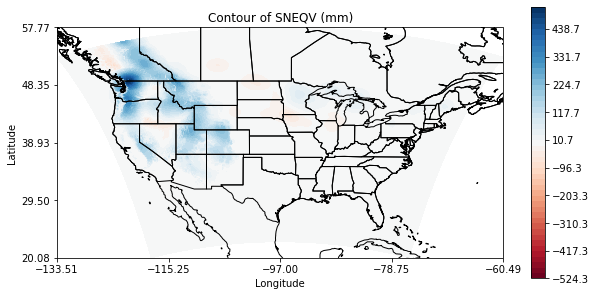

In [77]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, increment,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(title)
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as", thisoutfile, "\n")
plt.savefig("swe_increment_owp",facecolor='w', dpi = 400)

In [78]:
# Subset western Rockies
latmin = 1500
latmax = 3200
lonmin = 800
lonmax = 1700

lons2 = lons[latmin:latmax,lonmin:lonmax]
lats2 = lats[latmin:latmax,lonmin:lonmax]

increment2 = increment[latmin:latmax,lonmin:lonmax]

# Check if field has positve and negative values
# ----------------------------------------------
if np.min(increment2) < 0:
      cmax = np.max(np.abs(increment2))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(increment2)
      cmin = np.min(increment2)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,50)

 Saving figure as World_/Users/afox/Jedi/Jedi_experiments/output/letkf/conus_swe/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z_SNEQV.png 



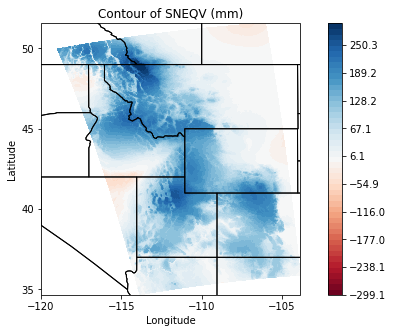

In [79]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons2, lats2, increment2,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
ax.set_xticks(np.linspace(-120, -105, 4), crs=projection)
ax.set_yticks(np.linspace(35, 50, 4), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(title)
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as", thisoutfile, "\n")
plt.savefig("swe_increment_western",facecolor='w', dpi = 400)

In [80]:
# Subset Colorado
latmin = 1620
latmax = 2100
lonmin = 1260
lonmax = 1930

lons2 = lons[latmin:latmax,lonmin:lonmax]
lats2 = lats[latmin:latmax,lonmin:lonmax]

increment2 = increment[latmin:latmax,lonmin:lonmax]
hgt2 = hgt[latmin:latmax,lonmin:lonmax]

# Check if field has positve and negative values
# ----------------------------------------------
if np.min(increment2) < 0:
      cmax = np.max(np.abs(increment2))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(increment2)
      cmin = np.min(increment2)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,50)

 Saving figure as World_/Users/afox/Jedi/Jedi_experiments/output/letkf/conus_swe/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z_SNEQV.png 



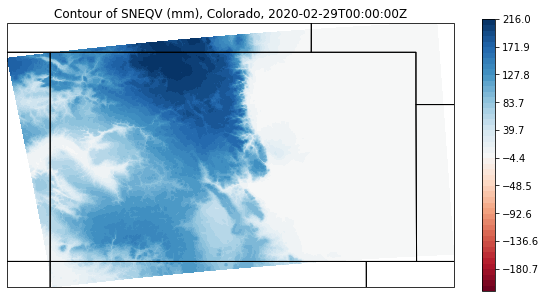

In [81]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons2, lats2, increment2,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
#ax.set_xticks(np.linspace(-120, -105, 4), crs=projection)
#ax.set_yticks(np.linspace(35, 50, 4), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(title+", Colorado, 2020-02-29T00:00:00Z")
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as", thisoutfile, "\n")
plt.savefig("swe_increment_colorado",facecolor='w', dpi = 400)

 Saving figure as hgt.png 



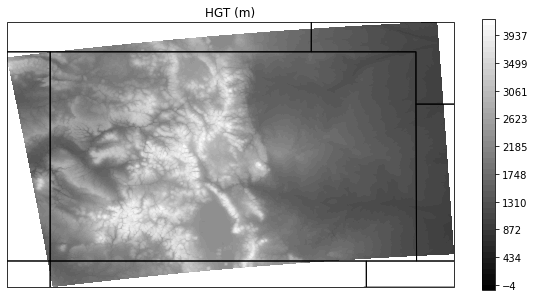

In [82]:
# Create two dimensional contour plot of HGT

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons2, lats2, hgt2,
                     transform=projection,
                     cmap=cmap_h,
                     levels=levels_h)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
#ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
#ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')
ax.set_title("HGT (m)")
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as hgt.png \n")
#plt.savefig("hgt_CO.png", facecolor='w', dpi = 400)

In [83]:
# Subset Northern Colorado
latmin = 1900
latmax = 2100
lonmin = 1460
lonmax = 1660

#latmin = 1950
#latmax = 2050
#lonmin = 1510
#lonmax = 1610

lons2 = lons[latmin:latmax,lonmin:lonmax]
lats2 = lats[latmin:latmax,lonmin:lonmax]

increment2 = increment[latmin:latmax,lonmin:lonmax]
hgt2 = hgt[latmin:latmax,lonmin:lonmax]

# Check if field has positve and negative values
# ----------------------------------------------
if np.min(increment2) < 0:
      cmax = np.max(np.abs(increment2))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(increment2)
      cmin = np.min(increment2)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,50)

 Saving figure as World_/Users/afox/Jedi/Jedi_experiments/output/letkf/conus_swe/letkf_inc.lsm.ens.0.2020-03-01T00:00:00Z_SNEQV.png 



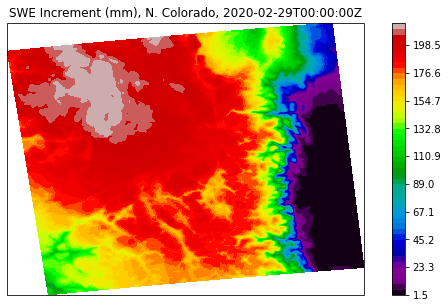

In [84]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons2, lats2, increment2,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

#ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
#ax.set_xticks(np.linspace(-120, -105, 4), crs=projection)
#ax.set_yticks(np.linspace(35, 50, 4), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("SWE Increment (mm), N. Colorado, 2020-02-29T00:00:00Z")
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as", thisoutfile, "\n")
plt.savefig("swe_increment_northern_colorado",facecolor='w', dpi = 400)

 Saving figure as hgt.png 



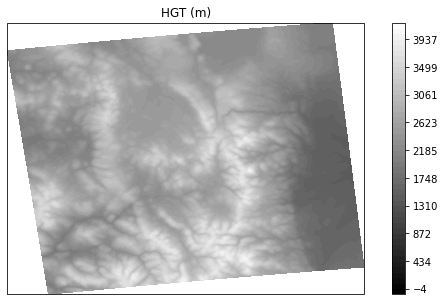

In [87]:
# Create two dimensional contour plot of HGT

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons2, lats2, hgt2,
                     transform=projection,
                     cmap=cmap_h,
                     levels=levels_h)

# Add coast lines to the plot
ax.coastlines()

#ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
#ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
#ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')
ax.set_title("HGT (m)")
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as hgt.png \n")
plt.savefig("./figures/hgt_northern_colorado.png", facecolor='w', dpi = 400)